<a href="https://www.kaggle.com/code/dsptlp/timelinegraph?scriptVersionId=164036228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from time import strftime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

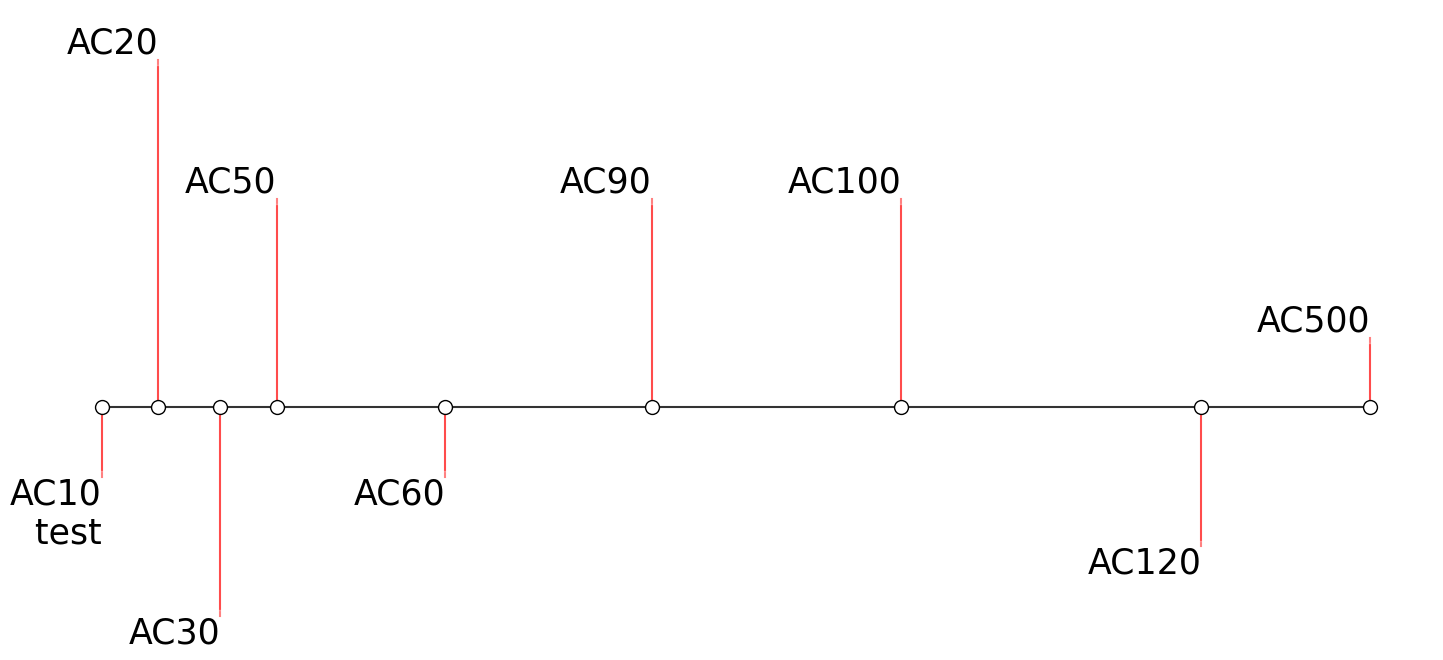

In [2]:
def plot_release_timeline(releases):
    fig, ax = plt.subplots(figsize=(18, 9))

    # Create the base line
    start = min(release[1] for release in releases)
    stop = max(release[1] for release in releases)
    ax.plot((0, (stop - start).days), (0, 0), 'k', alpha=.8)  # Adjust x-axis range

    # Iterate through releases annotating each one
    for index, (release_name, release_date, level) in enumerate(releases):
        delta_days = (release_date - start).days  # Calculate delta in days
        vert = 'top' if level < 0 else 'bottom'

        ax.scatter(delta_days, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
        # Plot a line up to the text
        ax.plot((delta_days, delta_days), (0, level), c='r', alpha=.7)
        
        # Give the text a faint background and align it properly
        ax.text(delta_days, level, release_name,
                horizontalalignment='right', verticalalignment=vert, fontsize=25,
                backgroundcolor=(1., 1., 1., .3))

    ax.set(title=" ")
    ax.set_xlabel('')  # Set x-axis label
    ax.get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))  # Show integers on x-axis
    fig.autofmt_xdate()

    # Disable x-axis
    ax.set_xticks([])  # Disable x-axis ticks
    ax.set_xticklabels([])  # Disable x-axis tick labels
    
    # Remove components 
    plt.setp((ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values())), visible=False)
    plt.show()

# Example usage
releases = [('AC10\n test', datetime.strptime('2019-01-01', "%Y-%m-%d"), -1),
            ('AC20', datetime.strptime('2019-01-10', "%Y-%m-%d"), 5),
            ('AC30', datetime.strptime('2019-01-20', "%Y-%m-%d"), -3),
            ('AC50', datetime.strptime('2019-01-29', "%Y-%m-%d"), 3),
            ('AC60', datetime.strptime('2019-02-25', "%Y-%m-%d"), -1),
            ('AC90', datetime.strptime('2019-03-30', "%Y-%m-%d"), 3),
            ('AC100', datetime.strptime('2019-05-09', "%Y-%m-%d"), 3),
            ('AC120', datetime.strptime('2019-06-26', "%Y-%m-%d"), -2),
            ('AC500', datetime.strptime('2019-07-23', "%Y-%m-%d"), 1)]

plot_release_timeline(releases)
